## Linear regression

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [2]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Width,Length,Area,Floors,Rooms,Toilets,Price,1 Part Residential,...,House Direction_NORTHEAST,House Direction_NORTHWEST,House Direction_SOUTH,House Direction_SOUTHEAST,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER
0,10.399917,4.006730,2.236068,1.117928,10.099505,0.0,0.0,0.0,-1.944261,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.400602,4.003590,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.906382,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.398891,4.009621,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.906382,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.399521,4.008289,2.236068,-1.085572,8.660254,0.0,0.0,0.0,-1.893012,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,10.397751,4.005646,2.236068,0.291615,10.000000,0.0,0.0,0.0,-1.794971,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Input variables

- Practice training

In [4]:
x = df.drop(columns=["Price"])
x.head()

,Longitude,Latitude,Width,Length,Area,Floors,Rooms,Toilets,1 Part Residential,All Residential,...,House Direction_NORTHEAST,House Direction_NORTHWEST,House Direction_SOUTH,House Direction_SOUTHEAST,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER
0,10.399917,4.006730,2.236068,1.117928,10.099505,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.400602,4.003590,2.236068,0.291615,10.000000,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.398891,4.009621,2.236068,0.291615,10.000000,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.399521,4.008289,2.236068,-1.085572,8.660254,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,10.397751,4.005646,2.236068,0.291615,10.000000,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##### Target variables

- Practice training

In [5]:
y = df[['Price']]
y.head()

,Price
0,-1.944261
1,-1.906382
2,-1.906382
3,-1.893012
4,-1.794971


##### Divide into 2 training sets and validation sets

 - Split data

In [6]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=500)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(11151, 32) (2788, 32)
(11151, 1) (2788, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [7]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [8]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[ 2.33943213e+02  9.07613806e+01 -7.08660097e-01 -7.03010064e-02
   3.55067290e-01  1.33939981e+00 -1.31928026e-01  4.77069425e-01
   1.49574893e-02 -1.86881987e-02 -3.97992792e-01 -6.53234009e-02
   1.80472502e-01 -3.77640688e-02 -3.34659178e-01  3.34659178e-01
  -3.83395110e-01  3.22327000e-01  3.95727289e-01 -3.34659178e-01
  -1.02321930e-02  4.90173720e-02  8.91423140e-04 -5.48432019e-02
   7.64813252e-02 -7.12190132e-02  1.18739835e-05  9.89241373e-03
  -1.35183223e-01 -5.35706276e-02  3.34659178e-01 -1.45905327e-01]]
Interception  :  [-2800.2168931]


##### Real estate price prediction

- On the train set

In [9]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[ 0.26103343],
       [ 0.63006437],
       [-0.43470241],
       ...,
       [ 0.13491982],
       [ 0.81527714],
       [-0.52717061]])

- Prediction on validation set

In [10]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[-0.1484944 ],
       [ 0.87171089],
       [-0.54766601],
       ...,
       [-0.48110521],
       [-0.30583569],
       [-0.4556992 ]])

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [11]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.4993549756959379


- Validation set

In [12]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.5259242618155097


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [13]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.5031331561940451


- Validation set

In [14]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: 0.46332652721072554


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [15]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 2.107400265502418


- Validation set

In [16]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 1.9670576903209136


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

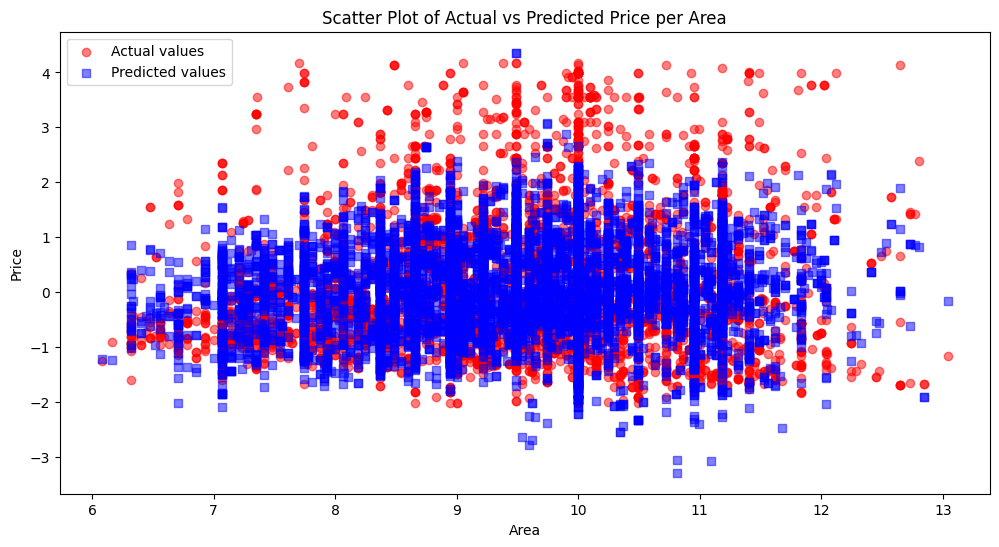

In [17]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area", "Area", "Price")

- Validation set 

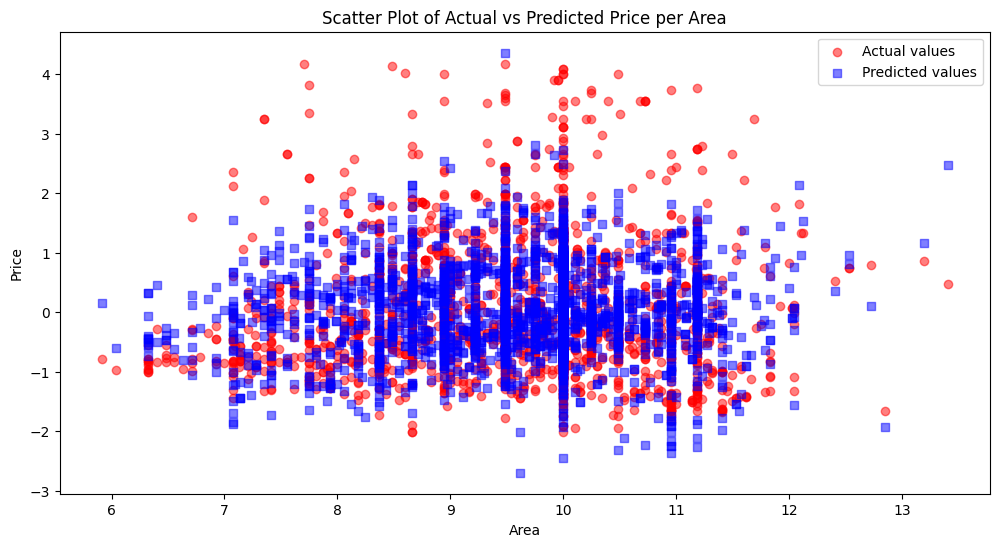

In [18]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area", "Area", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.